In [23]:
import numpy as np
import matplotlib.pyplot as plt
#真正的函数
def g(x):
    return 0.1*(x**3+x**2+x)
#随意准备一些向真正函数中加入一点噪声的训练数据

train_x=np.linspace(-2,2,8)
train_y=g(train_x)+np.random.randn(train_x.size)*0.05  


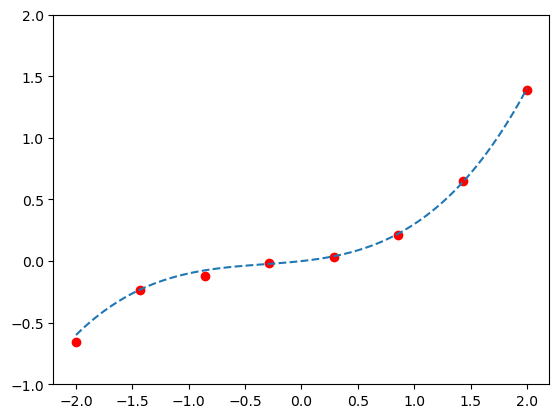

In [24]:
#绘图
x=np.linspace(-2,2,100)
plt.plot(train_x,train_y,'ro')
plt.plot(x,g(x),linestyle='dashed')
plt.ylim(-1,2)
plt.show()
#虚线是正确的分割，原点是加入的噪声

In [25]:
#用十次多项式进行数据训练 
#以下还没开始学习 首先不应用正则化状态

# 标准化

mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10,
    ]).T

X = to_matrix(train_z)

# 参数初始化
theta = np.random.randn(X.shape[1])

# 预测函数
def f(x):
    return np.dot(x, theta)


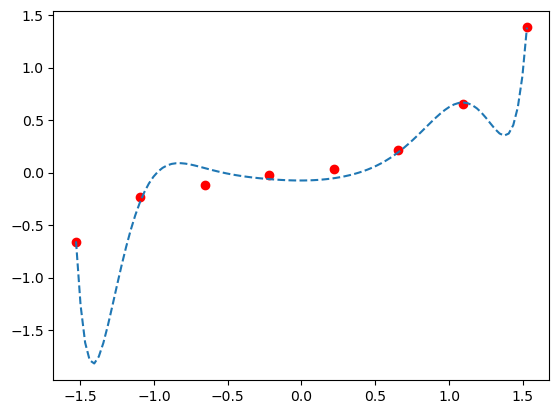

In [26]:
#yita值和学习的结束条件是根据我之前多次尝试的结果来决定的

# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 学习率
ETA = 1e-4

# 误差
diff = 1

# 重复学习
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
z=standardize(x)
plt.plot(train_z,train_y,'ro')
plt.plot(z,f(to_matrix(z)),linestyle='dashed')
plt.show()
#下图就是发生了过拟合状态，且并未使用正则化


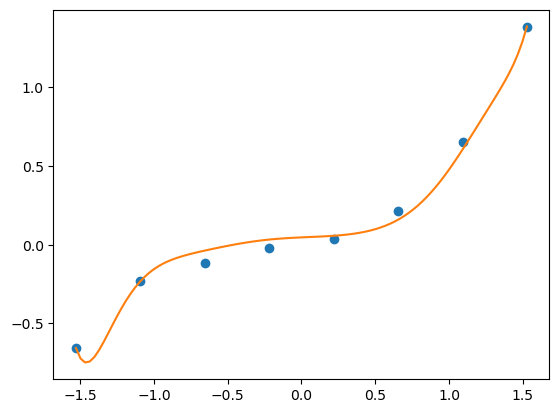

In [27]:
#我们就应用正则化来学习看看（图 5-17）。λ 的值也是根据我之 前多次尝试的结果来决定的。
# 保存未正则化的参数，然后再次参数初始化
theta1 = theta
theta = np.random.randn(X.shape[1])

# 正则化常量
LAMBDA = 1

# 误差
diff = 1

# 重复学习（包含正则化项）
error = E(X, train_y)
while diff > 1e-6:
    # 正则化项。偏置项不适用正则化，所以为0
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    # 应用正则化项，更新参数
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

# 对结果绘图
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

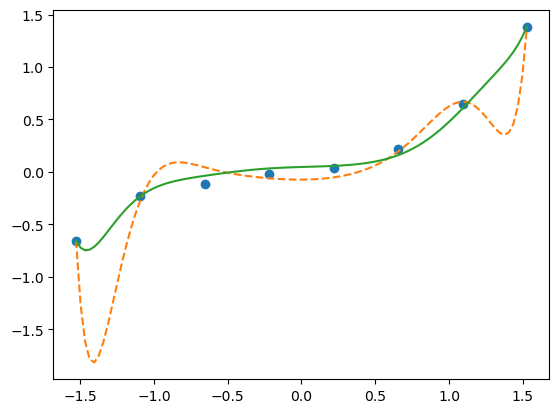

In [29]:
# 保存应用了正则化的参数
theta2 = theta

# 绘制训练数据
plt.plot(train_z, train_y, 'o')

# 绘出未应用正则化的结果
theta = theta1
plt.plot(z, f(to_matrix(z)), linestyle='dashed')

# 绘出应用了正则化的结果  绿色是正则化的情况
theta = theta2
plt.plot(z, f(to_matrix(z)))

# 显示所有绘图
plt.show()

梯度下降法有几个亚种，如动量法、Adagrad、Adadelta 和 Adam 等。发现有随机森林、支持 向量机和朴素贝叶斯等许许多多的算法。